# Week 12 Assignment - Simulating Dispersal with Objects

For this week's assignment, we're going to revisit the dispersal simulation that we worked on in Week 8. However, this time, we're going to use object-oriented programming. Specifically, we'll create two kinds of custom objects: `individual`s and `population`s.

Each `individual` will have 3 attributes (an id number, a x-axis position, and a y-position) and 3 methods (a constructor, a method to move its position by 1 unit, and a method to print its coordinate location as x,y).

Each `population` will have 2 attributes (a list of `individual`s in the `population` and a size for its map) and 4 methods (a constructor, a method to move each `individual` in the `population` 1 unit, a method to list the coordinate locations of all `individuals` in the `population`, and a method to display the locations of all `individual`s in the `population` as a scatter plot).

More details are provided below.

In [19]:
# Import necessary modules

import matplotlib.pyplot as plt
import random

In [20]:
# Define the individual class

class individual:
    # Add a docstring
    """ Class to hold ID number and the coordinates (x,y) of individuals. """
        
        
    def __init__(self,id=0,x=0,y=0):  # Add default values for id, x, and y
        # Add a docstring
        """ Constructor for individual class. """
        
        # The constructor should initialize the 3 attributes based on the values
        # passed as arguments to the constructor.
        
        # Defaults to all individuals starting at same position- (0,0)
        
        self.id = id
        self.x = x
        self.y = y

    
    def move(self): # Add necessary arguments
        # Add a docstring
        """ This method causes an individual to randomly move up, down, right, or 
        left, and updates the position accordingly. """
        
        # Similar to the code from week 8, the code in this method should cause an
        # individual to move one unit up, down, left, or right (chosen randomly).
        # The x and y coordinates for this individual should be modified accordingly.
        
        dirs = ["u","d","l","r"]
        direction = random.choice(dirs) # Randomly draws a direction - u, d, l, or r
        if direction == "u": # Test what direction was drawn and update position accordingly
            self.y = self.y + 1
        elif direction == "d":
            self.y = self.y - 1
        elif direction == "l":
            self.x = self.x - 1
        elif direction == "r":
            self.x = self.x + 1
        
        
    def printLocation(self): # Add necessary arguments
        # Add a docstring
        """ This method prints the ID and coordinates for an individual. """
        
        # This method should print a text description of the 
        # individual's id and location (x,y).
        
        print("Individual's ID is %d and their location is (%f,%f)." % (self.id,self.x,self.y))

In [21]:
# Define the population class

class population:
    # Add a docstring
    """ Class to hold population size and map size for the class 'individuals',
    includes the methods listLocations() and draw(). """
    
    
    def __init__(self,mapSize=10,popSize=5): # Add default values.
        # Add a docstring
        """ Constructor for population class. """
        
        # This constructor should create a list of individuals in the population. The 
        # number of individuals should be equal to popSize and each individual should have
        # a unique id. The constructor should also record the mapSize as an attribute.
        
        # Creates empty list of indivudals- assigns them each an ID number until the
        # population size is reached. 
        self.mapSize = mapSize
        self.popSize = popSize
        self.individuals = []
        for i in range(popSize):
            self.individuals.append(individual(i))
        
        
    def move(self): # Add necessary arguments
        # Add a docstring
        """ Method to move unit up, down, left, or right for individuals in 
        the population. """
        
        # The code in this method should use a for loop and cause each individual to 
        # move one unit up, down, left, or right. This code should call the .move() method
        # of each individual.
        
        for i in self.individuals:
            i.move()

        
    def listLocations(self): # Add necessary arguments
        # Add a docstring
        """ Method that prints each individuals location and ID in the population. """
        
        # The code in this method should use a for loop to print a text description of
        # each individual's location. This code should call the .printLocation() method
        # of each individual.
        
        for i in self.individuals:
            i.printLocation()
        
                
    def draw(self): # Add necessary arguments
        # Add a docstring
        """ Method that creates a scatterplot showing locations of all of the individuals
        in the population, with length of axes being determined by mapSize. """
       
        # The code in this method should use the .plot() method from pyplot to 
        # create a scatterplot showing the locations of all individuals in this
        # population. The length of the x- and y-axes should each by mapSize.
        
        xList = []
        yList = []

        # Adds new coordinates from random movement to x and y lists.
        for i in self.individuals:
            xList.append(i.x)
            yList.append(i.y)
    
        # Plots x and y lists (x_value,y_value) as red points. Graph is a scatterplot 
        # with a grid, and its axes are positive and negative values of mapSize.
        plt.axis([-self.mapSize, self.mapSize, -self.mapSize, self.mapSize])
        plt.plot(xList,yList,'ro')
        plt.grid(True,alpha=0.4)
        

Now that we've created the individual and population classes, let's use them to create populations of individuals and watch them disperse across a map.

Individual's ID is 0 and their location is (0.000000,-1.000000).
Individual's ID is 1 and their location is (-1.000000,0.000000).
Individual's ID is 2 and their location is (1.000000,0.000000).
Individual's ID is 3 and their location is (0.000000,-1.000000).
Individual's ID is 4 and their location is (1.000000,0.000000).
Individual's ID is 0 and their location is (1.000000,-1.000000).
Individual's ID is 1 and their location is (0.000000,0.000000).
Individual's ID is 2 and their location is (1.000000,-1.000000).
Individual's ID is 3 and their location is (1.000000,-1.000000).
Individual's ID is 4 and their location is (2.000000,0.000000).
Individual's ID is 0 and their location is (1.000000,-2.000000).
Individual's ID is 1 and their location is (0.000000,1.000000).
Individual's ID is 2 and their location is (2.000000,-1.000000).
Individual's ID is 3 and their location is (2.000000,-1.000000).
Individual's ID is 4 and their location is (3.000000,0.000000).
Individual's ID is 0 and their 

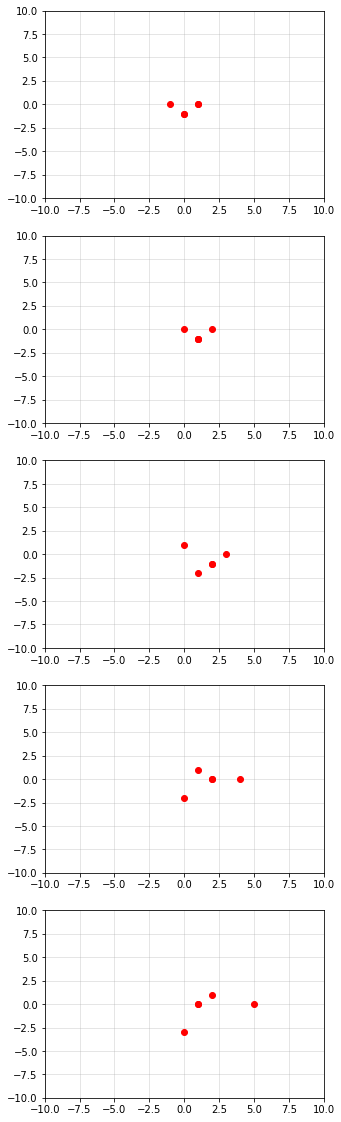

In [22]:
# Create a new population with default values

newPop = population()

# Assign the number of time steps that individuals will move

steps = 5

# Use a for loop to simulate the movement of individuals for the specified number of steps.
# Use the .draw() method of the population to draw the map.
# Use the .listLocations() method to list the locations of all individuals in the population.

# Simulates movement of individuals in newPop for 5 steps, creating subplots for each step.
# Locations are printed for every individual for each step, and graphs were adjusted to 
# be able to see them more clearly.
plt.figure(figsize=(5,20))
for i in range(steps):
    newPop.move()
    plt.subplot(steps,1,i+1)
    newPop.draw()
    newPop.listLocations()

Individual's ID is 0 and their location is (0.000000,1.000000).
Individual's ID is 1 and their location is (-1.000000,0.000000).
Individual's ID is 2 and their location is (1.000000,0.000000).
Individual's ID is 3 and their location is (-1.000000,0.000000).
Individual's ID is 4 and their location is (1.000000,0.000000).
Individual's ID is 5 and their location is (1.000000,0.000000).
Individual's ID is 6 and their location is (0.000000,-1.000000).
Individual's ID is 7 and their location is (0.000000,-1.000000).
Individual's ID is 8 and their location is (1.000000,0.000000).
Individual's ID is 0 and their location is (-1.000000,1.000000).
Individual's ID is 1 and their location is (-2.000000,0.000000).
Individual's ID is 2 and their location is (1.000000,-1.000000).
Individual's ID is 3 and their location is (-2.000000,0.000000).
Individual's ID is 4 and their location is (0.000000,0.000000).
Individual's ID is 5 and their location is (2.000000,0.000000).
Individual's ID is 6 and their l

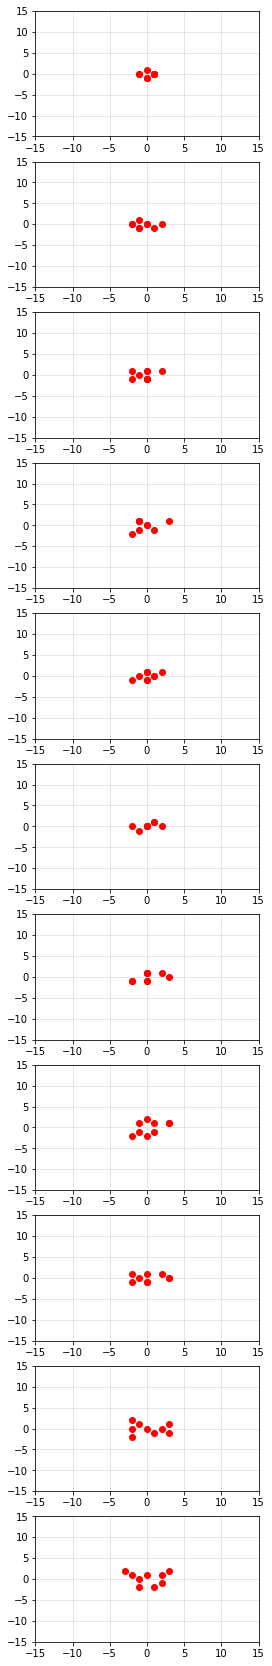

In [23]:
# Try creating a new population, simulating the movement of individuals, drawing a map,
# and listing the location of individuals, but provide non-default values for the mapSize
# and popSize of the population. Also, increase the number of time steps that individuals move.

secondPop = population(mapSize=15,popSize=9)
steps = 11

plt.figure(figsize=(4,30))

# Simulates movement of individuals in secondPop for 11 steps, creating subplots for each step.
# Locations are printed for every individual for each step, and graphs were adjusted to 
# be able to see them more clearly.
for i in range(steps):
    secondPop.move()
    plt.subplot(steps,1,i+1)
    secondPop.draw()
    secondPop.listLocations()